In [1]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
from nuclass.data import icecat1, icecat1_cut_path
from astropy.coordinates import SkyCoord, get_sun
from astropy.time import Time

Using matplotlib backend: module://matplotlib_inline.backend_inline


# Neutrino Data

 We use a catalogue of high-energy neutrinos from IceCuce known as ICECAT1.
The catalogue is downloaded from, and described at https://icecube.wisc.edu/data-releases/2023/04/icecat-1-the-icecube-event-catalog-of-alert-tracks/ . It contains neutrinos through to the end of 2023.

You can find the latest list of neutrino alerts on the GCN page https://gcn.gsfc.nasa.gov/amon_icecube_gold_bronze_events.html , and sign up to receive notifications or access via API.

In [2]:
icecat1

,NAME,RUNID,EVENTID,START,EVENTMJD,I3TYPE,RA,DEC,RA_ERR_PLUS,RA_ERR_MINUS,...,ENERGY,FAR,SIGNAL,CASCADE_SCR,SKIMMING_SCR,START_SCR,STOP_SCR,THRGOING_SCR,CR_VETO,OTHER_I3TYPES
0,IC110514A,118178,17334444,2011-05-14 01:32:22.654109,55695.064151,gfu-gold,138.47,-1.94,6.68,3.78,...,187.0,1.30,0.508,3.460000e-07,4.480000e-07,8.110000e-02,4.650000e-05,0.919000,False,NaN
1,IC110610A,118309,46569873,2011-06-10 10:13:33.147086,55722.426078,gfu-gold,272.55,35.64,1.67,2.42,...,294.0,0.25,0.750,3.370000e-10,3.990000e-11,1.200000e-06,1.290000e-04,1.000000,False,gfu-bronze
2,IC110616A,118342,24578488,2011-06-16 17:30:53.939961,55728.729791,gfu-bronze,71.15,5.38,1.41,2.07,...,109.0,4.34,0.257,7.820000e-09,1.320000e-07,5.160000e-05,1.830000e-05,1.000000,False,NaN
3,IC110714A,118435,58198553,2011-07-14 02:42:41.855488,55756.112984,hese-gold,68.20,40.67,0.31,1.10,...,72.0,0.11,0.778,4.330000e-05,1.100000e-05,8.760000e-01,1.810000e-05,0.124000,False,hese-bronze
4,IC110726A,118475,52691508,2011-07-26 12:15:33.258167,55768.510802,gfu-bronze,151.08,6.99,1.19,1.71,...,160.0,1.92,0.396,5.000000e-02,1.390000e-06,9.460000e-01,2.020000e-04,0.003820,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,IC230725A,138193,21103478,2023-07-25 21:30:51.063687,60150.896424,gfu-bronze,327.04,12.33,2.20,2.02,...,145.0,1.68,0.394,2.270000e-07,2.180000e-10,1.000000e+00,3.760000e-09,0.000132,False,NaN
344,IC230727A,138198,44334860,2023-07-27 16:05:39.630288,60152.670598,gfu-bronze,33.66,7.63,1.14,0.70,...,113.0,3.38,0.294,4.880000e-06,9.160000e-10,1.000000e+00,1.080000e-07,0.000053,False,NaN
345,IC230914A,138354,45413430,2023-09-14 05:21:03.717216,60201.222960,gfu-bronze,163.83,31.83,2.55,2.02,...,168.0,0.88,0.544,2.760000e-13,8.770000e-08,3.220000e-08,2.960000e-07,1.000000,False,NaN
346,IC231004A,138415,56188508,2023-10-04 14:39:41.180329,60221.610893,gfu-gold,143.79,25.04,1.05,0.97,...,442.0,0.45,0.842,8.750000e-11,1.440000e-08,1.440000e-04,6.870000e-05,1.000000,False,gfu-bronze


In [3]:
list(x for x in icecat1.columns)

['NAME',
 'RUNID',
 'EVENTID',
 'START',
 'EVENTMJD',
 'I3TYPE',
 'RA',
 'DEC',
 'RA_ERR_PLUS',
 'RA_ERR_MINUS',
 'DEC_ERR_PLUS',
 'DEC_ERR_MINUS',
 'ENERGY',
 'FAR',
 'SIGNAL',
 'CASCADE_SCR',
 'SKIMMING_SCR',
 'START_SCR',
 'STOP_SCR',
 'THRGOING_SCR',
 'CR_VETO',
 'OTHER_I3TYPES']

# Let's explain what some of these fields are...

(**Copied directly from IceCube's documentation**)

For each event, the CSV table contains:
 - RUNID,EVENTID: Unique RunID and EventID combination from IceCube DAQ system
 - START,EVENTMJD: Date/time of event detection
:q
 - I3TYPE: Identification of event selection type (see supporting paper publication for details).  gfu-gold, gfu-bronze, ehe-gold, hese-gold, or hese-bronze types
 - OTHER_I3TYPES: List of other I3TYPE event selection types this event additionally passed.
 - RA,DEC [deg] (and _ERR): Best fit direction in J2000 equatorial coordinates, with asymmetric 90% CL error rectangle boundaries.
 - ENERGY:[TeV] Most probable neutrino energy that would have produced this event.  Calculated assuming an E^(-2.19) astrophysical neutrino power law flux.
 - FAR: [yr^(-1)] Rate of background events expected for alert events at this energy and sky location.
 - SIGNAL: Probability event is of astrophysical origin, calculated assuming an E^(-2.19) astrophysical neutrino power law flux.
 - *_SCR: Probabilities from post-alert convolutional neural network based classifier applied to each event to  better distinguish each events topological signal in the detector
     - THRGOING_SCR: Primary event vertex outside is the detector and a muon-like track is observed passing through the instrumented volume
     - START_SCR: Primary event vertex is inside the instrumented volume and a muon-like track is seen
     - CASCADE_SCR: Primary event vertex is inside the instrumented volume and a shower (non-muon-like track) is observed
     - SKIMMING_SCR: Primary event vertex outside is the detector and little or no energy deposited within instrumented volume
     - STOP_SCR: Primary event vertex outside is the detector and a muon-like track is observed stopping in the instrumented volume
 - CR_VETO [Bool]: Significant in-time cosmic-ray shower activity detected in the surface IceTop array, indicating this event is likely a background event.  
     - Note: at time of alert creation this was not available, and therefore events have been evaluated and tagged after fact rather than removed. 

**An additional note about names**

IceCube neutrinos are named in the same way as GRBs:

    IC + date of detection + alphabetical order key

So the first neutrino detected on 2024 September 01 would be IC240901A, the second would be IC240901B, and so on.

# Understanding the neutrino alert data

IceCube's effective area varies as a function of declination, and azimuth. 

However, because the Earth rotates and IceCube is at the South Pole, azimuthal variations get smoothed out over time. Zenith variations do not. 

(-1.0, 1.0)

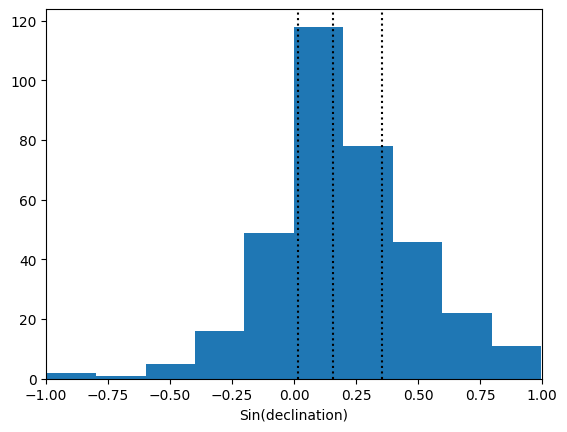

In [4]:
# Plot the distribution of alerts as a function of sin(declination). Is it uniform?

# Remember to convert from degrees to radians first!
sindecs = np.sin(np.radians(icecat1["DEC"]))

plt.hist(sindecs) # Sin(dec) not dec to account for projection effects for a sphere

# Plot median, and 25th/75th percentile 
for val in [25, 50., 75.]:
    plt.axvline(np.percentile(sindecs, val, axis=0), linestyle=":", color="k")

plt.xlabel("Sin(declination)")
plt.xlim(-1., 1.)

(0.0, 360.0)

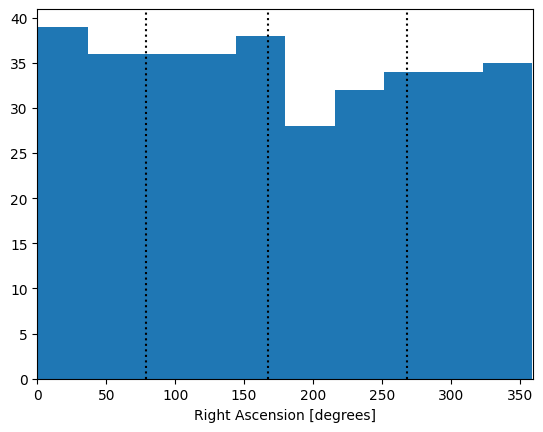

In [5]:
# Plot RA, is it uniform?
plt.hist(icecat1["RA"])
for val in [25, 50., 75.]:
    plt.axvline(np.percentile(icecat1["RA"], val, axis=0), linestyle=":", color="k")
plt.xlabel("Right Ascension [degrees]")
plt.xlim(0., 360.)

# Augmenting Neutrino Data

## Localisation Area

In [6]:
# Let's approximate the localisation from IceCube as a rectangle. 
# The true contour is not always Gaussian/elliptical, and is not released in real time.
# Generally the simplest thing is to just take the rectangle at face value.

# What is the area of each alert? Remember to account for projection on a sphere - https://en.wikipedia.org/wiki/Great-circle_distance 

ang = np.radians(icecat1["DEC"])
delta_ra = (icecat1["RA_ERR_PLUS"] + icecat1["RA_ERR_MINUS"]) * np.pi/180.
width_dec = (icecat1["DEC_ERR_PLUS"] + icecat1["DEC_ERR_MINUS"]) * np.pi/180.

width_ra = np.arccos(np.sin(ang)**2. + (np.cos(ang)**2. * np.cos(delta_ra)))

area = (width_ra * width_dec) * (180. / np.pi)**2.

icecat1["AREA"] = area

In [7]:
# What is the median localisation?
print(f'Median neutrino area is {icecat1["AREA"].median():.1f} sq. deg, mean is {icecat1["AREA"].mean():.1f}')

Median neutrino area is 7.7 sq. deg, mean is 25.1


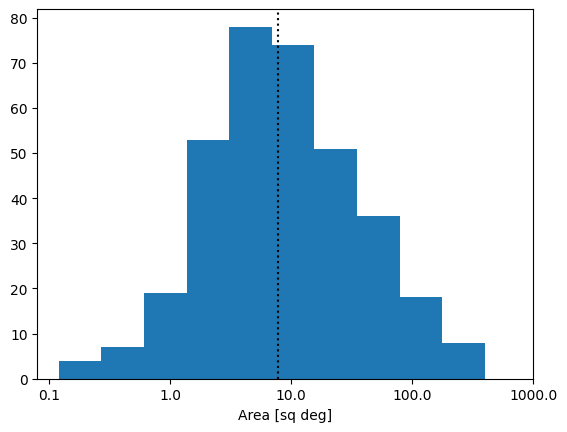

In [8]:
plt.hist(np.log10(icecat1["AREA"]))
plt.xlabel("Area [sq deg]")
x_ticks = np.logspace(-1, 3, 5) # Convert labels from log
plt.xticks(np.log10(x_ticks), x_ticks)
plt.axvline(np.log10(icecat1["AREA"].median()), color="k", linestyle=":")

The neutrino localisations vary dramatically. The median is ~8 sq deg, but some have localisations > 100 sq deg. 
This is due to the topology of each event, with some neutrinos being much easier to reconstruct than others. The probability that an object accidentally coincides with a neutrino is much higher for large neutrinos. 

In [9]:
# Now make some basic cuts to select "high-quality alerts"

mask = (
    (~icecat1["CR_VETO"].astype(bool))  # Is the neutrino alert coincident with a cosmic ray air shower? If so, likely background.
    & (icecat1["AREA"] < 35.) # Is the neutrino localisation reasonably small?
    & (icecat1["SIGNAL"] > 0.5) # Is the neutrino likely to be astrophysical
)

print(f"Selected {mask.sum()} neutrinos out of {len(mask)} total neutrinos")

Selected 97 neutrinos out of 348 total neutrinos


In [10]:
icecat1[mask].to_csv(icecat1_cut_path)